In [1]:
# Exercise 4: Optimize

In [20]:
from tensorflow import keras
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense

In [4]:
# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [11]:
# ==============================================
# PART 1: Without scaling
# ==============================================
print("\n" + "="*50)
print("TRAINING WITHOUT SCALING")
print("="*50)

# Create the model
model_unscaled = Sequential([
    Dense(10, activation='sigmoid', input_dim=X.shape[1]),  # 30 inputs
    Dense(5, activation='sigmoid'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model_unscaled.compile(
    optimizer='adam',                    # Adam optimizer
    loss='binary_crossentropy',         # Binary classification loss
    metrics=['accuracy']                # Track accuracy
)

# Train the model
history_unscaled = model_unscaled.fit(
    X_train, y_train,
    epochs=30,                          # Number of training iterations
    batch_size=32,                      # Samples per gradient update
    validation_split=0.2,               # Use 20% of training data for validation
    verbose=1
)

# Evaluate on test set
test_loss, test_accuracy = model_unscaled.evaluate(X_test, y_test)
print(f"\nTest Accuracy (unscaled): {test_accuracy:.4f}")


TRAINING WITHOUT SCALING
Epoch 1/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.3736 - loss: 0.7033 - val_accuracy: 0.3626 - val_loss: 0.6996
Epoch 2/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3846 - loss: 0.6965 - val_accuracy: 0.6484 - val_loss: 0.6916
Epoch 3/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6264 - loss: 0.6895 - val_accuracy: 0.6374 - val_loss: 0.6856
Epoch 4/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6264 - loss: 0.6842 - val_accuracy: 0.6374 - val_loss: 0.6804
Epoch 5/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6264 - loss: 0.6795 - val_accuracy: 0.6374 - val_loss: 0.6760
Epoch 6/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6264 - loss: 0.6759 - val_accuracy: 0.6374 - val_loss: 0.6719
Epoch 7/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6264 - loss: 0.6725 - val_accuracy: 0.6374 - val_loss: 0.6689
Epoch 8/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6264 - loss: 0.6702 - 

In [21]:
# ==============================================
# PART 2: With scaling (BETTER PRACTICE!)
# ==============================================
print("\n" + "="*50)
print("TRAINING WITH SCALING")
print("="*50)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the model (same architecture)
model_scaled = Sequential([
    Input(shape=(X.shape[1],)),          # Input layer
    Dense(10, activation='sigmoid'),
    Dense(5, activation='sigmoid'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_scaled.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model
history_scaled = model_scaled.fit(
    X_train_scaled, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Evaluate on test set
test_loss_scaled, test_accuracy_scaled = model_scaled.evaluate(
    X_test_scaled, y_test
)
print(f"\nTest Accuracy (scaled): {test_accuracy_scaled:.4f}")


TRAINING WITH SCALING
Epoch 1/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.3736 - loss: 0.9863 - val_accuracy: 0.3626 - val_loss: 0.9699
Epoch 2/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3736 - loss: 0.9408 - val_accuracy: 0.3626 - val_loss: 0.9245
Epoch 3/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3736 - loss: 0.8971 - val_accuracy: 0.3626 - val_loss: 0.8812
Epoch 4/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3736 - loss: 0.8578 - val_accuracy: 0.3626 - val_loss: 0.8403
Epoch 5/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3736 - loss: 0.8196 - val_accuracy: 0.3626 - val_loss: 0.8047
Epoch 6/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3736 - loss: 0.7854 - val_accuracy: 0.3626 - val_loss: 0.7724
Epoch 7/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3736 - loss: 0.7549 - val_accuracy: 0.3626 - val_loss: 0.7435
Epoch 8/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3736 - loss: 0.7277 - v

In [22]:
# Compare results
print("\n" + "="*50)
print("COMPARISON")
print("="*50)
print(f"Accuracy without scaling: {test_accuracy:.4f}")
print(f"Accuracy with scaling:    {test_accuracy_scaled:.4f}")
print(f"Improvement: {(test_accuracy_scaled - test_accuracy):.4f}")

# Why scaling matters:
# - Features have different ranges (e.g., 0-1000 vs 0-1)
# - Large values can dominate the learning process
# - Scaling normalizes features to similar ranges
# - Results in faster convergence and better performance


COMPARISON
Accuracy without scaling: 0.6228
Accuracy with scaling:    0.9737
Improvement: 0.3509


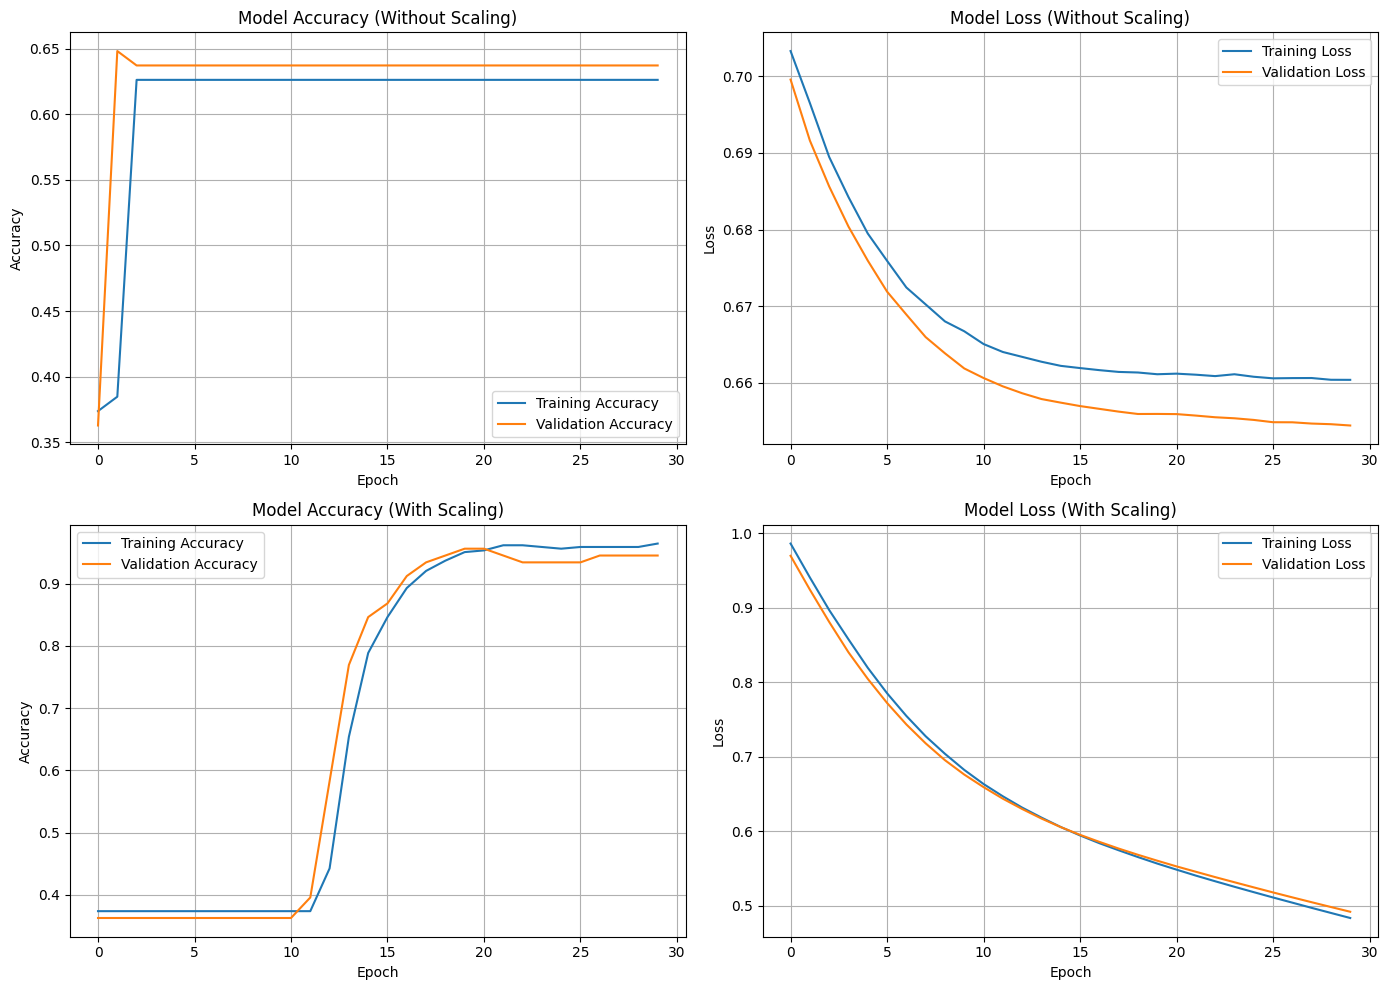

In [23]:
import matplotlib.pyplot as plt

# Plot training history for both models
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Accuracy without scaling
axes[0, 0].plot(history_unscaled.history['accuracy'], label='Training Accuracy')
axes[0, 0].plot(history_unscaled.history['val_accuracy'], label='Validation Accuracy')
axes[0, 0].set_title('Model Accuracy (Without Scaling)')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Plot 2: Loss without scaling
axes[0, 1].plot(history_unscaled.history['loss'], label='Training Loss')
axes[0, 1].plot(history_unscaled.history['val_loss'], label='Validation Loss')
axes[0, 1].set_title('Model Loss (Without Scaling)')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].legend()
axes[0, 1].grid(True)

# Plot 3: Accuracy with scaling
axes[1, 0].plot(history_scaled.history['accuracy'], label='Training Accuracy')
axes[1, 0].plot(history_scaled.history['val_accuracy'], label='Validation Accuracy')
axes[1, 0].set_title('Model Accuracy (With Scaling)')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Accuracy')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Plot 4: Loss with scaling
axes[1, 1].plot(history_scaled.history['loss'], label='Training Loss')
axes[1, 1].plot(history_scaled.history['val_loss'], label='Validation Loss')
axes[1, 1].set_title('Model Loss (With Scaling)')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Loss')
axes[1, 1].legend()
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

In [24]:
# KEY OBSERVATIONS
# Top Row: Without Scaling 

#     Accuracy: Stuck around 60-65% with minimal improvement
#     Loss: Remains high (~0.6-0.7) with little convergence
#     The model essentially fails to learn meaningful patterns


# Bottom Row: With Scaling 

#     Accuracy: Rapidly converges to ~97% for both training and validation
#     Loss: Steadily decreases to near zero (~0.05)
#     Smooth, stable training with excellent generalization
     

#  Why This Matters 

# This visualization perfectly illustrates a fundamental principle in deep learning: neural networks 
# are sensitive to input feature scales. The breast cancer dataset contains features with vastly 
# different ranges (e.g., tumor radius vs. fractal dimension), and without scaling: 

#     Features with larger magnitudes dominate the learning process
#     Gradient updates become unstable
#     The optimizer struggles to find good parameter updates
     

#  Practical Takeaway 

# Always preprocess your data! Feature scaling isn't optional—it's essential for: 

#     Faster convergence
#     Better final performance  
#     More stable training
#     Reproducible results
     

# The 30+ percentage point improvement in accuracy (from ~65% to ~97%) shows that proper data preprocessing 
# can be more impactful than complex model architectures for many real-world problems. 